# ***(1 / a) K-Nearest Neighbour based regression ***

In [ ]:
#Uploading the dataset for regression in google colab
from google.colab import files
uploaded = files.upload()

Saving regression_dataset.data to regression_dataset (1).data


In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
#Reading the dataset
df = pd.read_csv(io.BytesIO(uploaded['regression_dataset.data']))
df.columns = ['Symboling', 'Normalized_loss', 'Make', 'Fuel','Aspiration','Num_of_doors','body_style','drive_wheels','Engine_location','Wheel_base','Length','Width','Height','Curb_weight','Engine_type','Num_of_cylinders','Engine_size','Fuel_system','Bore','Stroke','Compression_ratio','Horsepower','Peak_rpm','City_mpg','Highway_mpg','Price']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 2 to 203
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Normalized_loss      160 non-null    category
 1   Fuel                 160 non-null    object  
 2   Aspiration           160 non-null    object  
 3   body_style           160 non-null    object  
 4   drive_wheels         160 non-null    object  
 5   Wheel_base           160 non-null    float64 
 6   Length               160 non-null    float64 
 7   Width                160 non-null    float64 
 8   Height               160 non-null    float64 
 9   Curb_weight          160 non-null    int64   
 10  Engine_type          160 non-null    object  
 11  Num_of_cylinders     160 non-null    object  
 12  Engine_size          160 non-null    int64   
 13  Bore                 160 non-null    object  
 14  Stroke               160 non-null    object  
 15  Compression_ratio    16

In [ ]:
#Dropping the unnecesarry columns
df = df.drop(['Make','Num_of_doors','Engine_location','Fuel_system','Symboling'], axis = 1)

In [ ]:
#Dropping the rows containg missing values
df = df[df['Normalized_loss'] != '?']
df = df[df['Fuel'] != '?']
df = df[df['Aspiration'] != '?']
df = df[df['body_style'] != '?']
df = df[df['drive_wheels'] != '?']
df = df[df['Engine_type'] != '?']
df = df[df['Num_of_cylinders'] != '?']
df = df[df['Stroke'] != '?']
df = df[df['Horsepower'] != '?']
df = df[df['Peak_rpm'] != '?']
df = df[df['Price'] != '?']

In [ ]:
#Label Encoding each categorical output for regression
df['Normalized_loss'] = df['Normalized_loss'].astype('float64')
df['Fuel'] = df['Fuel'].astype('category')
df['Fuel'] = df['Fuel'].cat.codes
df['Aspiration'] = df['Aspiration'].astype('category')
df['Aspiration'] = df['Aspiration'].cat.codes
df['body_style'] = df['body_style'].astype('category')
df['body_style'] = df['body_style'].cat.codes
df['drive_wheels'] = df['drive_wheels'].astype('category')
df['drive_wheels'] = df['drive_wheels'].cat.codes
df['Engine_type'] = df['Engine_type'].astype('category')
df['Engine_type'] = df['Engine_type'].cat.codes
df['Num_of_cylinders'] = df['Num_of_cylinders'].astype('category')
df['Num_of_cylinders'] = df['Num_of_cylinders'].cat.codes
df['Stroke'] = df['Stroke'].astype('float64')
df['Horsepower'] = df['Horsepower'].astype('float64')
df['Peak_rpm'] = df['Peak_rpm'].astype('float64')
df['Bore'] = df['Bore'].astype('float64')
df['Price'] = df['Price'].astype('float64')

In [ ]:
#Randomly splitting into train and test set
rand_ind = np.random.permutation(df.shape[0]) -1
train = df.iloc[rand_ind[0:128], :]
test = df.iloc[rand_ind[128+ 1 : ], :]
Y_train = train['Price']
Y_test = test['Price']
train.drop('Price', axis = 1)
X_train = train
test.drop('Price', axis = 1)
X_test = test

In [ ]:
def kNNReg (X_train, Y_train, X_test,Y_test, k):
  mse = 0
  for iter in range(X_test.shape[0]):
    x = X_test.iloc[iter, :]
    y = Y_test.iloc[iter]
    diff = X_train-x
    dist = np.linalg.norm( diff, 2, axis = 1 )   #Calculating the L2 Norm
    idx = np.argsort( dist )
    yhat = 0
    for i in range( k ):
      yhat = yhat + Y_train.iloc[idx[i]]
    yhat = yhat/k     #Taking the average value of the k-nearest neighbour as y-value
    mse = mse + np.square(yhat - y)
  mse = mse/n
  return np.sqrt(mse)    #Returning the root mean square error of the predicted values by the kNN Regression

In [ ]:
result = kNNReg (X_train, Y_train, X_test, Y_test, 1)
print(result)

1700.432886061664


# ***( 1 / b ) Finding optimal value of K by Cross-validation***

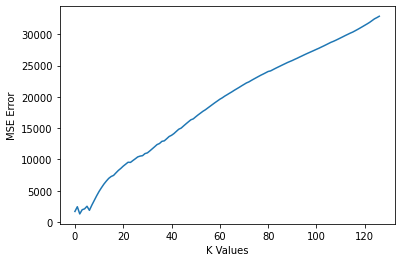

In [ ]:
arr = np.array([])
for k in range (1, X_train.shape[0]):
  result = kNNReg (X_train, Y_train, X_test, Y_test, k)
  arr = np.append(arr, [result])
import matplotlib.pyplot as plt
plt.plot(arr)
plt.ylabel('RMSE Error')
plt.xlabel('K Values')
plt.show()

The above plot shows how our Root Mean Square Error value varies with the K-values. We have make that plot again below to findthe optimal k-values

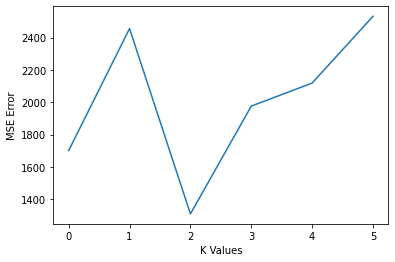

In [ ]:
arr = np.array([])
for k in range (1, 7): #X_train.shape[0]):
  result = kNNReg (X_train, Y_train, X_test, Y_test, k)
  arr = np.append(arr, [result])
import matplotlib.pyplot as plt
plt.plot(arr)
plt.ylabel('MSE Error')
plt.xlabel('K Values')
plt.show()


The above plot shows that the optimum K-value is 2, where the root mean square error is lowest.

# ***( 2 / a ) Training a decision Tree based Classification Model***

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult.data to adult (1).data


In [ ]:
original_df_for_training = pd.read_csv(io.BytesIO(uploaded['adult.data']))

In [ ]:
df = original_df_for_training.copy()

In [ ]:
df.head()

39          State-gov   77516   Bachelors  ...   0  40   United-States   <=50K
0  50   Self-emp-not-inc   83311   Bachelors  ...   0  13   United-States   <=50K
1  38            Private  215646     HS-grad  ...   0  40   United-States   <=50K
2  53            Private  234721        11th  ...   0  40   United-States   <=50K
3  28            Private  338409   Bachelors  ...   0  40            Cuba   <=50K
4  37            Private  284582     Masters  ...   0  40   United-States   <=50K

[5 rows x 15 columns]

In [ ]:
df.columns = ['age','work_class','final_weight','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country', 'y_value']

In [ ]:
df = df[df['work_class'] != ' ?']
df = df[df['education'] != ' ?']
df = df[df['marital_status'] != ' ?']
df = df[df['occupation'] != ' ?']
df = df[df['y_value'] != ' ?']
df = df[df['relationship'] != ' ?']
df = df[df['race'] != ' ?']
df = df[df['hours_per_week'] != ' ?']
df = df[df['native_country'] != ' ?']

In [ ]:
#Dropping unnecessary features 
df.drop('final_weight', axis = 1, inplace = True)
df.drop('native_country', axis =1, inplace = True)
df.drop('race', axis =1, inplace = True)

In [ ]:
#Changing the income attribute value to -1 if income is <=50K and 1 if income is >50
for i in range (df.shape[0]):
  if df.iloc[i,11] == ' <=50K':
    df.iloc[i,11] = -1
  else:
    df.iloc[i,11] = 1

In [ ]:
#Doing label encoding of all the categorical attributes
df['work_class'] = df['work_class'].astype('category')
df['work_class'] = df['work_class'].cat.codes
df['education'] = df['education'].astype('category')
df['education'] = df['education'].cat.codes
df['marital_status'] = df['marital_status'].astype('category')
df['marital_status'] = df['marital_status'].cat.codes
df['occupation'] = df['occupation'].astype('category')
df['occupation'] = df['occupation'].cat.codes
df['relationship'] = df['relationship'].astype('category')
df['relationship'] = df['relationship'].cat.codes
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
#df['sex'] = df['sex'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30161 non-null  int64 
 1   work_class      30161 non-null  int8  
 2   education       30161 non-null  int8  
 3   education_num   30161 non-null  int64 
 4   marital_status  30161 non-null  int8  
 5   occupation      30161 non-null  int8  
 6   relationship    30161 non-null  int8  
 7   sex             30161 non-null  int8  
 8   capital_gain    30161 non-null  int64 
 9   capital_loss    30161 non-null  int64 
 10  hours_per_week  30161 non-null  int64 
 11  y_value         30161 non-null  object
dtypes: int64(5), int8(6), object(1)
memory usage: 1.8+ MB


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
class Node:
  # A node stores its own depth (root = depth 0), its decision stump, its parent, child information and list of categorical attribute.
  # Leaf nodes also store a constant label that is assigned to every data point that reaches that leaf
  def __init__( self, depth = 0, stump = (0,0,0), parent = None, list_of_categorical_attributes = [1,2,4,5,6,7] ):
    self.depth = depth
    self.stump = stump
    self.parent = parent
    #self.left = None
    #self.right = None
    self.child = []
    self.isLeaf = True
    self.cat_attr = list_of_categorical_attributes
    self.label = 0
        
  def predict( self, data ):
    #Leaf predicting directly
    if self.isLeaf:
      return self.label
    # Else one of the childrens is asked to do the job
    else:
      # self.stump[1] is -1 while the specific splitting attribute is a categorical attribute
      # Otherwise the attribute is a continious attribute
      if(self.stump[1] != (-1)):
        if data[self.stump[0]] > self.stump[1]:
          return self.child[1].predict( data )
        else:
          return self.child[0].predict( data )
      else:
        for i in range(len(stamp[2])):
          if data[self.stump[0]] == self.stamp[2][i]:
            return self.child[i].predict(data)

  def getStump( self, X):
    # The finction finding the optimum feature and its threshold value to split. 
    # It returns a tuple of best feature name, best threshold value and null list in case of a continious feature.
    # And it returns the feature name, -1 and the unique feature values, in case the feature is a continious value.
    n = X.size
    bestObjective = (-1) * float('inf')
    p = X['y_value'].value_counts()/n
    total_entropy = (-1)*np.sum(p*np.log2(p+1e-9))    
    # For each of the features in the data
    for i in range( X.shape[1]-1 ):
      # Do not use the same feature as used by the parent node
      if self.parent is not None and i == self.parent.stump[0]:
        continue
      # Find out all values at which we can threshold that feature
      candidateThresholds = np.unique(np.sort( X.iloc[:, i] ))
      idx = np.argsort( X.iloc[:, i] )
      list_of_unique_values=[]  # The list which will contain the unique values of features in case of a categorical attribute
      if i not in self.cat_attr:
        # i th attribute is a continious attribute. Hence we shall get an optimum threshold value and two children at two sides of the threshold.
        for j in candidateThresholds:
          p = X.loc[(X[X.columns[i]] <= j )]['y_value'].value_counts()/X.shape[0]
          left_entropy = (-1) * np.sum(p*np.log2(p+1e-9))
          p = X.loc[(X[X.columns[i]] > j )]['y_value'].value_counts()/X.shape[0]
          right_entropy = (-1) * np.sum(p*np.log2(p+1e-9))
          ig = total_entropy - (left_entropy + right_entropy)
          if (ig>=bestObjective):
            bestObjective = ig
            best_feature = i
            best_threshold_value = j
      else:
        #For categorical attribute, there will be the number of children as many number of unique different categories.
        entropy_after_split = 0
        for j in candidateThresholds:
          p = X.loc[(X[X.columns[i]] == j )]['y_value'].value_counts()/X.shape[0]
          entropy_after_split_for_j = (-1) * np.sum(p*np.log2(p+1e-9))
          entropy_after_split = entropy_after_split + entropy_after_split_for_j
        ig = total_entropy - entropy_after_split
        if (ig>=bestObjective) :
          bestObjective = ig
          best_feature = i
          best_threshold_value = (-1) # indicates categorical feature
          list_of_unique_values = candidateThresholds
    return (best_feature, best_threshold_value, list_of_unique_values)
  def train( self, X, maxLeafSize, maxDepth ):
    # If too few data points are present, or else if this node is too deep 1in the tree, make this a leaf
    if X.size < maxLeafSize or self.depth >= maxDepth:
      self.isLeaf = True
      self.label = 1 if np.sum( X['y_value'] ) >= 0 else (-1)
    else:
      # This node will be split and hence it is not a leaf
      self.isLeaf = False
      # Get the best possible decision stump
      self.stump = self.getStump( X )
      if self.stump[1] != (-1):
        self.child.append( Node( depth = self.depth + 1, parent = self ))
        self.child.append(Node( depth = self.depth + 1, parent = self ))
        Xhat1 = X.loc[X[X.columns[self.stump[0]]]<=self.stump[1]]
        self.child[0].train( Xhat1, maxLeafSize, maxDepth )
        Xhat2 = X.loc[X[X.columns[self.stump[0]]]>self.stump[1]]
        self.child[1].train( Xhat2, maxLeafSize, maxDepth )
      else:
        for i in len(stamp[2]):
          self.child.append( Node( depth = self.depth + 1, parent = self ))
          Xhat = X.loc[X[X.column(self.stamp[0])] == self.stamp[2][i]]
          self.child[i].train(Xhat, maxLeafSize, maxDepth )
    return ''

In [ ]:
class Tree:
  def __init__( self, maxLeafSize = 9, maxDepth = 15 ):
    self.root = Node()
    self.maxLeafSize = maxLeafSize
    self.maxDepth = maxDepth 
        
  def predict( self, xt ):
    return self.root.predict( xt )
    
  def train( self, X ):
    self.root.train( X, self.maxLeafSize, self.maxDepth )

In [ ]:
#Training of the decision tree
DT = Tree()
train = df.iloc[:, :]
DT.train( train )

In [ ]:
#Uploadng the test dataset
from google.colab import files
uploaded = files.upload()

Saving adult.test to adult (2).test


Below codes process the test data set

In [ ]:
columns = ['age','work_class','final_weight','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','y_value']
df_test = pd.read_csv(io.BytesIO(uploaded['adult.test']),names= columns,  skiprows = 1, na_values='?')

In [ ]:
original_df_for_testing = df_test.copy()

In [ ]:
df_test.drop('final_weight', axis = 1, inplace = True)
df_test.drop('native_country', axis =1, inplace = True)
df_test.drop('race', axis =1, inplace = True)

In [ ]:
for i in range (df_test.shape[0]):
  if df_test.iloc[i,11] == ' <=50K.':
    df_test.iloc[i,11] = -1
  else:
    df_test.iloc[i,11] = 1

In [ ]:
df_test = df_test[df_test['work_class'] != ' ?']
df_test = df_test[df_test['education'] != ' ?']
df_test = df_test[df_test['marital_status'] != ' ?']
df_test = df_test[df_test['occupation'] != ' ?']
df_test = df_test[df_test['y_value'] != ' ?']
df_test = df_test[df_test['relationship'] != ' ?']
#df_test = df_test[df_test['race'] != ' ?']
df_test = df_test[df_test['hours_per_week'] != ' ?']
#df_test = df_test[df_test['native_country'] != ' ?']
df_test['y_value'] = df_test['y_value'].astype('int')
df_test['work_class'] = df_test['work_class'].astype('category')
df_test['work_class'] = df_test['work_class'].cat.codes
df_test['education'] = df_test['education'].astype('category')
df_test['education'] = df_test['education'].cat.codes
df_test['marital_status'] = df_test['marital_status'].astype('category')
df_test['marital_status'] = df_test['marital_status'].cat.codes
df_test['occupation'] = df_test['occupation'].astype('category')
df_test['occupation'] = df_test['occupation'].cat.codes
df_test['relationship'] = df_test['relationship'].astype('category')
df_test['relationship'] = df_test['relationship'].cat.codes
df_test['sex'] = df_test['sex'].astype('category')
df_test['sex'] = df_test['sex'].cat.codes
#df['sex'] = df['sex'].astype('category')


In [ ]:

#test = df.iloc[train_size_tmp+1: , : ]
X_test = df_test.iloc[:, :df.shape[1]-2]
Y_test = df_test['y_value']  #.iloc[:, df.shape[1]-1:df.shape[1]-1]
#DT.train( train )
y_predicted = np.zeros((df_test.shape[0]))
s=0
for i in range (X_test.shape[0]):
  y_predicted[i] = DT.predict(X_test.iloc[i, :])
  if (Y_test.iloc[i] == y_predicted[i] ) :
    s = s+1
print("Sum =================")
print(s)
print((s/Y_test.shape[0])*100)

IndexError: ignored

In [ ]:
y_predicted = np.zeros((df.shape[0]))
for i in range (df.shape[0]):
  y_predicted[i] = DT.predict(df.iloc[i, :])
  if (df.iloc[i, 11] == y_predicted[i] ) :
    s = s+1
print("Sum =================")
print(s)
print((s/Y_test.shape[0])*100)

Sum =================
26425
172.5432582435521


# ***(2/b) Use of cross validation to optimize the parameters***

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
arr = np.array([])
maxLeafSize = 9
for maxDepth in range (1, 20):
  DT = Tree( maxLeafSize = 9, maxDepth = maxDepth )
  train = df.iloc[:, :]
  DT.train( train )
  y_predicted = np.zeros((df_test.shape[0]))
  s=0
  for i in range (X_test.shape[0]):
    y_predicted[i] = DT.predict(X_test.iloc[i, :])
    if (Y_test.iloc[i] == y_predicted[i] ) :
      s = s+1
    #print("Sum =================")
    #print(s)
  a = (s/Y_test.shape[0])*100
  arr=np.append(arr, [a])
plt.plot(arr)


KeyboardInterrupt: ignored

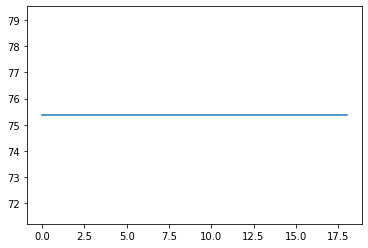

In [ ]:
arr = np.array([])
maxDepth = 9 
for max_leaf in range (1, 20):
  DT = Tree( maxLeafSize = max_leaf, maxDepth = 9 )
  train = df.iloc[:, :]
  DT.train( train )
  y_predicted = np.zeros((df_test.shape[0]))
  s=0
  for i in range (X_test.shape[0]):
    y_predicted[i] = DT.predict(X_test.iloc[i, :])
    if (Y_test.iloc[i] == y_predicted[i] ) :
      s = s+1
    #print("Sum =================")
    #print(s)
  a = (s/Y_test.shape[0])*100
  arr=np.append(arr, [a])
plt.plot(arr)

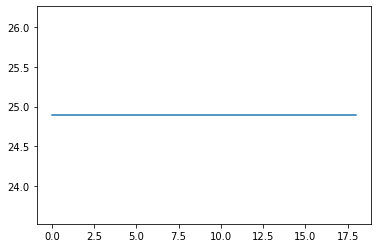

In [ ]:
arr = np.array([])
maxLeafSize = 9
for maxDepth in range (1, 20):
  DT = Tree( maxLeafSize = 9, maxDepth = maxDepth )
  train = df.iloc[:, :]
  DT.train( train )
  y_predicted = np.zeros((df.shape[0]))
  s=0
  for i in range (df.shape[0]):
    y_predicted[i] = DT.predict(df.iloc[i, :])
    if (df.iloc[i,11] == y_predicted[i] ) :
      s = s+1
    #print("Sum =================")
    #print(s)
  a = (s/df.shape[0])*100
  arr=np.append(arr, [a])
plt.plot(arr)